<a href="https://colab.research.google.com/github/Aninda07/Aninda07/blob/main/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype("float32")/255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype("float32")/255

Image (#9): Which is digit '4'


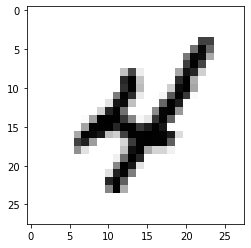

In [ ]:
 digit = 9 # Change to choose new digit
a = X_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")

In [ ]:
 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 from keras.optimizers import SGD

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
   
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 31s 20ms/step - loss: 0.3482 - accuracy: 0.8899 - val_loss: 0.0774 - val_accuracy: 0.9783
Epoch 2/3
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0639 - val_accuracy: 0.9812
Epoch 3/3
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0538 - val_accuracy: 0.9846
